In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
URL = 'https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Robot%20Execution%20Failures%20Data%20Set/Robot_Failures%20LP1_Grasp_position.csv'

In [3]:
df = pd.read_csv(URL)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V82,V83,V84,V85,V86,V87,V88,V89,V90,Class
0,-1,-1,63,-3,-1,0,0,0,62,-3,...,-3,0,0,-1,0,64,-2,-1,0,3
1,-1,-1,63,-2,-1,0,-1,-1,63,-3,...,-6,-3,-1,-1,-1,59,-3,-4,0,3
2,-1,0,57,-5,-3,0,0,-3,63,-1,...,-6,-2,-1,-1,0,54,-4,-3,0,3
3,0,-1,59,-2,-1,-1,0,-3,61,-1,...,-4,0,0,-1,1,63,-8,-2,0,3
4,0,-2,65,-4,-2,0,-1,-2,56,-5,...,-8,-4,-1,-1,1,57,-9,-4,-1,3


In [4]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V82,V83,V84,V85,V86,V87,V88,V89,V90,Class
83,-29,-10,-208,180,12,-11,-29,-4,-246,192,...,396,101,-23,-105,63,-912,394,100,-25,4
84,4,6,50,-25,1,0,4,8,44,-26,...,-46,14,-7,19,14,2,-42,10,-7,2
85,21,15,-14,-46,16,-7,23,18,-27,-49,...,-88,154,4,148,69,-411,-95,191,8,4
86,171,86,-486,-113,222,13,198,96,-566,-125,...,-118,466,44,342,154,-1036,-118,466,44,4
87,-6,3,52,-15,-17,3,-7,2,52,-17,...,-29,-27,5,-13,2,15,-25,-25,6,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      88 non-null     int64
 1   V2      88 non-null     int64
 2   V3      88 non-null     int64
 3   V4      88 non-null     int64
 4   V5      88 non-null     int64
 5   V6      88 non-null     int64
 6   V7      88 non-null     int64
 7   V8      88 non-null     int64
 8   V9      88 non-null     int64
 9   V10     88 non-null     int64
 10  V11     88 non-null     int64
 11  V12     88 non-null     int64
 12  V13     88 non-null     int64
 13  V14     88 non-null     int64
 14  V15     88 non-null     int64
 15  V16     88 non-null     int64
 16  V17     88 non-null     int64
 17  V18     88 non-null     int64
 18  V19     88 non-null     int64
 19  V20     88 non-null     int64
 20  V21     88 non-null     int64
 21  V22     88 non-null     int64
 22  V23     88 non-null     int64
 23  V24     88 non-nu

In [6]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V87      0
V88      0
V89      0
V90      0
Class    0
Length: 91, dtype: int64

In [7]:
Co = df.corr()
Co

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V82,V83,V84,V85,V86,V87,V88,V89,V90,Class
V1,1.000000,-0.223471,0.304443,-0.097071,0.515489,0.109519,0.708264,-0.266557,0.208447,-0.116555,...,-0.143545,0.316821,0.204351,0.559680,-0.076586,0.139169,-0.149900,0.323266,0.205689,-0.072418
V2,-0.223471,1.000000,-0.472712,0.143097,0.137704,-0.269697,-0.277581,0.766378,-0.316677,0.126496,...,0.191336,0.057211,-0.146799,-0.252452,0.576337,-0.366165,0.207450,0.022095,-0.159401,0.132019
V3,0.304443,-0.472712,1.000000,0.209337,0.078997,0.054716,0.363907,-0.395906,0.888063,0.247226,...,0.049211,0.014428,0.185732,0.214762,-0.356481,0.435058,0.033387,0.036957,0.198306,-0.524353
V4,-0.097071,0.143097,0.209337,1.000000,0.369643,-0.453852,-0.057010,0.310198,0.281310,0.717590,...,0.611141,0.262241,-0.105470,-0.189854,0.221098,0.067518,0.613536,0.272856,-0.140345,-0.232571
V5,0.515489,0.137704,0.078997,0.369643,1.000000,-0.111914,0.206898,0.104514,0.101181,0.283990,...,0.335037,0.419431,-0.015595,0.132420,0.257251,0.059525,0.337514,0.427885,-0.046208,-0.218705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V87,0.139169,-0.366165,0.435058,0.067518,0.059525,-0.078554,0.104583,-0.295565,0.282627,0.103466,...,0.186317,0.121300,0.011801,0.240667,-0.389415,1.000000,0.151904,0.146469,0.017694,-0.478036
V88,-0.149900,0.207450,0.033387,0.613536,0.337514,-0.086967,-0.165636,0.314925,0.084729,0.785808,...,0.990137,0.520854,-0.213982,-0.293614,0.454486,0.151904,1.000000,0.524032,-0.263707,-0.160188
V89,0.323266,0.022095,0.036957,0.272856,0.427885,-0.016273,0.394533,0.060986,0.023345,0.346845,...,0.524516,0.995296,-0.076377,0.505671,0.469818,0.146469,0.524032,1.000000,-0.127753,0.004221
V90,0.205689,-0.159401,0.198306,-0.140345,-0.046208,0.336354,0.203601,-0.100153,0.107726,-0.154998,...,-0.237532,-0.115379,0.985662,0.307367,-0.375079,0.017694,-0.263707,-0.127753,1.000000,-0.016430


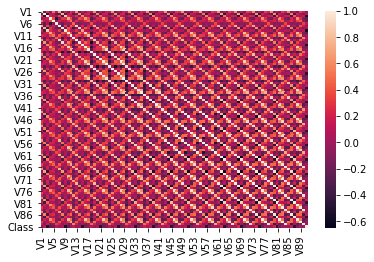

In [8]:
sns.heatmap(Co)

In [9]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V82,V83,V84,V85,V86,V87,V88,V89,V90,Class
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,-3.147727,10.977273,-91.715909,-39.704545,12.113636,-0.954545,-8.068182,7.715909,-167.034091,-49.875000,...,-40.761364,-3.397727,-0.250000,-2.170455,10.965909,-145.056818,-39.477273,-4.681818,0.113636,2.818182
std,50.281858,38.048359,280.592884,145.335692,105.333671,22.852807,44.831176,43.990581,412.138534,137.374295,...,152.493527,100.914159,18.056902,58.894650,45.555687,365.696890,152.636521,106.763521,19.575044,1.150167
min,-254.000000,-86.000000,-1428.000000,-450.000000,-226.000000,-137.000000,-246.000000,-103.000000,-1395.000000,-467.000000,...,-527.000000,-600.000000,-63.000000,-260.000000,-127.000000,-1547.000000,-599.000000,-646.000000,-71.000000,1.000000
25%,-10.500000,-2.000000,-118.000000,-79.250000,-14.000000,-1.000000,-14.250000,-2.250000,-165.750000,-59.750000,...,-34.500000,-8.000000,-1.000000,-2.000000,-1.000000,-190.250000,-39.000000,-8.250000,-1.000000,2.000000
50%,-1.000000,1.000000,43.500000,-11.000000,-1.000000,0.000000,-1.000000,1.000000,45.000000,-12.000000,...,-9.000000,-4.000000,0.000000,-1.000000,1.000000,50.000000,-9.000000,-3.000000,0.000000,3.000000
75%,3.000000,15.000000,59.250000,-2.000000,8.500000,3.000000,0.250000,14.000000,60.000000,-1.750000,...,-3.000000,1.250000,2.000000,1.250000,7.250000,60.000000,-3.000000,1.250000,2.000000,4.000000
max,185.000000,219.000000,157.000000,686.000000,494.000000,98.000000,198.000000,205.000000,146.000000,385.000000,...,396.000000,466.000000,101.000000,342.000000,236.000000,65.000000,394.000000,466.000000,108.000000,4.000000


In [ ]:
sns.pairplot(df,diag_kind='kde',kind='reg')

In [10]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
       'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'Class'],
      dtype='object')

In [11]:
df.Class

0     3
1     3
2     3
3     3
4     3
     ..
83    4
84    2
85    4
86    4
87    2
Name: Class, Length: 88, dtype: int64

In [13]:
Target = df.Class

In [14]:
T = pd.get_dummies(Target)
T

,1,2,3,4
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
83,0,0,0,1
84,0,1,0,0
85,0,0,0,1
86,0,0,0,1


In [15]:
F = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
       'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90']]

In [17]:
F.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,-1,-1,63,-3,-1,0,0,0,62,-3,...,60,-3,0,0,-1,0,64,-2,-1,0
1,-1,-1,63,-2,-1,0,-1,-1,63,-3,...,66,-6,-3,-1,-1,-1,59,-3,-4,0
2,-1,0,57,-5,-3,0,0,-3,63,-1,...,65,-6,-2,-1,-1,0,54,-4,-3,0
3,0,-1,59,-2,-1,-1,0,-3,61,-1,...,63,-4,0,0,-1,1,63,-8,-2,0
4,0,-2,65,-4,-2,0,-1,-2,56,-5,...,59,-8,-4,-1,-1,1,57,-9,-4,-1


In [18]:
from sklearn.preprocessing import normalize,LabelEncoder

In [19]:
he = normalize(F,norm='max')

In [20]:
he[0:5]

array([[-0.015625  , -0.015625  ,  0.984375  , -0.046875  , -0.015625  ,
         0.        ,  0.        ,  0.        ,  0.96875   , -0.046875  ,
        -0.015625  ,  0.        , -0.015625  , -0.015625  ,  0.953125  ,
        -0.046875  ,  0.        ,  0.        , -0.015625  , -0.015625  ,
         0.984375  , -0.03125   , -0.015625  ,  0.        , -0.015625  ,
        -0.015625  ,  0.984375  , -0.046875  , -0.015625  ,  0.        ,
        -0.015625  , -0.015625  ,  0.984375  , -0.046875  , -0.015625  ,
         0.        , -0.015625  , -0.015625  ,  0.984375  , -0.046875  ,
         0.        ,  0.        , -0.015625  , -0.015625  ,  0.984375  ,
        -0.046875  , -0.015625  ,  0.        , -0.015625  , -0.015625  ,
         0.984375  , -0.046875  , -0.015625  ,  0.        , -0.015625  ,
        -0.015625  ,  0.953125  , -0.046875  ,  0.        ,  0.        ,
        -0.015625  , -0.015625  ,  0.953125  , -0.046875  ,  0.        ,
         0.        , -0.015625  , -0.015625  ,  1. 

In [21]:
Target

0     3
1     3
2     3
3     3
4     3
     ..
83    4
84    2
85    4
86    4
87    2
Name: Class, Length: 88, dtype: int64

In [22]:
le =LabelEncoder()
T = le.fit_transform(Target)
T

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3,
       3, 2, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1],
      dtype=int64)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
Lr = LogisticRegression()

In [25]:
Lr.fit(F,T)

c:\users\me\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [26]:
Lr.coef_

array([[-5.46897183e-02,  6.02415219e-02, -6.87779765e-02,
         1.03523879e-03,  4.53445048e-02,  1.31241141e-02,
        -7.60063056e-02, -5.61991117e-02, -1.46209419e-02,
        -6.29634499e-02,  1.07059025e-02, -1.23166419e-01,
         1.20022509e-02,  1.29816764e-02, -2.61781353e-02,
         1.26903543e-01, -8.17676162e-02, -7.87476235e-04,
         4.31466398e-02, -9.13919710e-03, -1.70415311e-02,
        -7.09664392e-02,  1.08464594e-01,  1.19634954e-02,
         4.20790306e-02, -5.80915547e-02,  1.43598314e-02,
         7.32561556e-02,  2.44532314e-02,  2.33640458e-02,
         7.02508160e-02,  3.03130061e-02,  5.75786205e-02,
         6.56138390e-03,  4.15156496e-02, -2.24569219e-02,
         2.39435789e-02,  2.01379220e-02,  3.10789323e-02,
         9.79735994e-04,  6.42209369e-02,  3.32904098e-02,
         4.83965190e-02,  3.85163245e-02, -8.64707605e-02,
        -4.29688846e-02,  5.59234864e-02,  1.41461447e-02,
         9.67771991e-02, -5.84217902e-02, -1.45940027e-0

In [27]:
importance = Lr.coef_[2]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.01477
Feature: 1, Score: 0.00728
Feature: 2, Score: 0.01408
Feature: 3, Score: -0.02631
Feature: 4, Score: 0.00246
Feature: 5, Score: -0.04298
Feature: 6, Score: 0.03435
Feature: 7, Score: 0.08427
Feature: 8, Score: 0.11670
Feature: 9, Score: 0.10695
Feature: 10, Score: -0.02294
Feature: 11, Score: 0.10099
Feature: 12, Score: -0.02176
Feature: 13, Score: 0.01879
Feature: 14, Score: -0.04269
Feature: 15, Score: -0.10416
Feature: 16, Score: 0.08349
Feature: 17, Score: -0.00303
Feature: 18, Score: -0.02541
Feature: 19, Score: 0.01456
Feature: 20, Score: -0.03214
Feature: 21, Score: 0.07757
Feature: 22, Score: -0.02606
Feature: 23, Score: -0.01437
Feature: 24, Score: -0.02487
Feature: 25, Score: 0.05494
Feature: 26, Score: -0.01110
Feature: 27, Score: -0.06773
Feature: 28, Score: 0.04499
Feature: 29, Score: -0.03336
Feature: 30, Score: -0.05286
Feature: 31, Score: -0.04995
Feature: 32, Score: -0.11554
Feature: 33, Score: -0.00928
Feature: 34, Score: -0.02930
Feature: 3

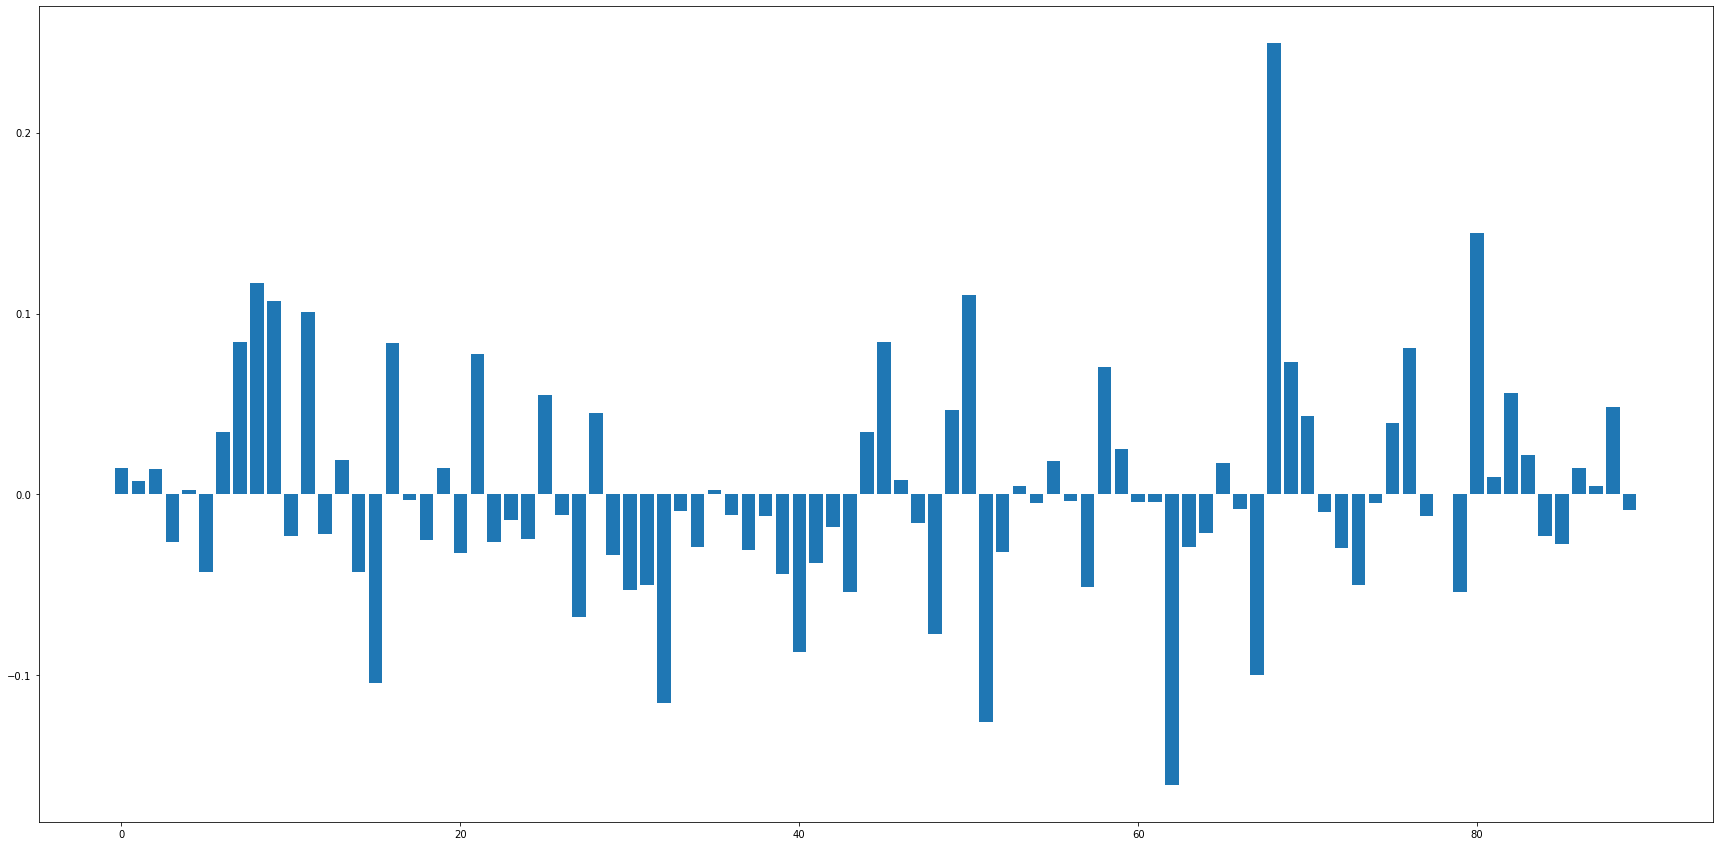

In [28]:
plt.figure(figsize=(30,15))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

In [29]:
Lr.score(F,T)

1.0

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
Knn = KNeighborsClassifier()

In [32]:
Knn.fit(F,T)

KNeighborsClassifier()

In [33]:
Knn.score(F,T)

0.8977272727272727